### Problem Statement: Given a train dataset predict the total_processing_time of the test dataset.

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/vishwatatva-datacon-2020/test.csv
/kaggle/input/vishwatatva-datacon-2020/sample_submission.csv
/kaggle/input/vishwatatva-datacon-2020/train.csv


## Loading Train Dataset

In [3]:
df = pd.read_csv("/kaggle/input/vishwatatva-datacon-2020/train.csv")
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,4,6,7,10,11,12,13,14,17,18,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,...,p_size,b_size,size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,allocated _memory,total_processing_time
0,1,131.760000,vp8,640,480,104723.0,25.145,37,3257.0,0.0,...,778937,0,1.7248e+06,flv,539000.0,24,640,480.0,221152.0,1.048
1,2,189.956000,flv,320,240,231296.0,29,97,5597.0,0.0,...,4.91173e+06,0,5.49203e+06,flv,109000.0,29.97,320,240.0,218664.0,-0.468
2,3,110.966995,h264,480,360,NaN,30,59,3271.0,0.0,...,4.97866e+06,0,5.50829e+06,h264,56000.0,15,320,240.0,216820.0,3.696
3,4,95.462000,h264,640,480,809256.0,29,51,2811.0,0.0,...,8.77016e+06,0,9.65666e+06,vp8,109000.0,12,320,240.0,221160.0,3.452
4,5,63.667000,h264,640,480,972572.0,15,33,923.0,0.0,...,6.48044e+06,0,7.7401e+06,flv,56000.0,24,1280,720.0,219656.0,2.692


## Data Cleaning and Analysis:
**Analysing the training Dataset checking the important vales for every column like mean, standard deviation of data and interquartile range also checking if there are any nan values.**

In [4]:
df.describe()

,id,video_duration,bitrate,p_frames,b_frames,bitrate_output,output_height,allocated _memory
count,48150.000000,48137.000000,4.813800e+04,48125.000000,48145.000000,4.812800e+04,48135.00000,4.813000e+04
mean,24075.500000,286.398789,6.926718e+05,6530.854483,8.703666,1.428838e+07,519.39919,8.221118e+05
std,13899.852068,294.088513,1.094609e+06,6111.190606,90.733736,2.562983e+09,2098.55597,8.263332e+07
min,1.000000,31.080000,-3.971120e+05,-5974.000000,-44.000000,0.000000e+00,-720.00000,-8.643220e+05
25%,12038.250000,106.765000,1.343340e+05,2329.000000,0.000000,1.090000e+05,240.00000,2.168200e+05
50%,24075.500000,239.141660,2.911500e+05,5515.000000,0.000000,5.390000e+05,360.00000,2.194800e+05
75%,36112.750000,379.320000,6.529670e+05,9155.000000,0.000000,3.000000e+06,720.00000,2.196560e+05
max,48150.000000,25844.086000,6.010942e+06,304959.000000,9407.000000,5.600000e+11,360000.00000,1.656680e+10


In [5]:
df.isnull().sum()

id                         0
video_duration            13
coding_standard            8
width                     20
height                     6
bitrate                   12
framerate                 17
i_frames                   9
p_frames                  25
b_frames                   5
frames                    21
i_size                    30
p_size                    35
b_size                     0
size                      32
coding_standard_output    37
bitrate_output            22
framerate_output           8
output_width               7
output_height             15
allocated _memory         20
total_processing_time      3
dtype: int64

**we can clearly see that there are some Nan Values Present in the data set so as the number of Nan values is less we can fill those values with the mean of their particular column.**

**REPLACING NAN VALUES WITH MEAN VALUES**

In [6]:
def replace_nan():
    for i in range(1, 22):
        try:
            mean = df.iloc[:, i].mean(skipna=True)
            df.iloc[:, i].fillna(mean, inplace = True)
        except TypeError:
            pass
        
replace_nan()
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

id                        0
video_duration            0
coding_standard           0
width                     0
height                    0
bitrate                   0
framerate                 0
i_frames                  0
p_frames                  0
b_frames                  0
frames                    0
i_size                    0
p_size                    0
b_size                    0
size                      0
coding_standard_output    0
bitrate_output            0
framerate_output          0
output_width              0
output_height             0
allocated _memory         0
total_processing_time     0
dtype: int64

**Now after removing all the nan values we will check the data types of all the columns as we need numerical values for machine learning algorithmsn we will convert the categorical data into numerical data.**

In [8]:
df.dtypes

id                          int64
video_duration            float64
coding_standard            object
width                      object
height                     object
bitrate                   float64
framerate                  object
i_frames                   object
p_frames                  float64
b_frames                  float64
frames                     object
i_size                     object
p_size                     object
b_size                     object
size                       object
coding_standard_output     object
bitrate_output            float64
framerate_output           object
output_width               object
output_height             float64
allocated _memory         float64
total_processing_time      object
dtype: object

#### It can be seen that many of the columns are still pandas objets so this means that there are som abnormal values in these columns so we will fing those values and drop them or replace them with the mean of that particular column.

### It is observed that the different str values in the columns are :
1. "0"
2. "#NAME?"
3. "-"

**Now we will drop the columns with these values**

In [9]:
df = df[df['total_processing_time'] != '#NAME?']
df = df[(df['coding_standard_output'] != '0')]

In [10]:
names = ['video_duration', 'coding_standard', 'width', 'height', 'bitrate',
       'framerate', 'i_frames', 'p_frames', 'b_frames', 'frames', 'i_size',
       'p_size', 'b_size', 'size', 'coding_standard_output', 'bitrate_output',
       'framerate_output', 'output_width', 'output_height',
       'allocated _memory', 'total_processing_time']

In [11]:
for i in names:
    df = df[df[i] != '#NAME?']
    df = df[df[i] != '-']

**Now we have successfully removed all the abnormalities in the data set now we can do our further analysis before that we will convert all the columns to float data type.**

In [12]:
for i in names:
    try:
        df[i] = pd.to_numeric(df[i], downcast = "float")
    except:
        continue

In [13]:
df.dtypes

id                          int64
video_duration            float32
coding_standard            object
width                     float32
height                    float32
bitrate                   float32
framerate                 float32
i_frames                  float32
p_frames                  float32
b_frames                  float32
frames                    float32
i_size                    float32
p_size                    float32
b_size                    float32
size                      float32
coding_standard_output     object
bitrate_output            float32
framerate_output          float32
output_width              float32
output_height             float32
allocated _memory         float32
total_processing_time     float32
dtype: object

**As you can see above all the columns now have Numerical data type except for coding_standard_output and coding_standard as these columns consist of categorical data.**

## Visual Analysis :
 
1. Scatter Plots
2. Heat Map
3. Box Plot

### Scatter Plot:

**We can get to know about the relation of data with our target variable, lets plot some graphs**

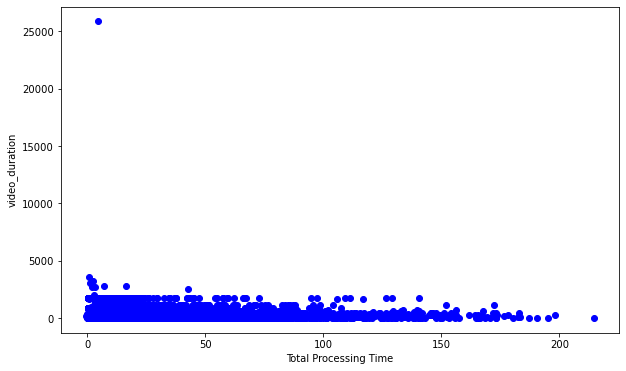

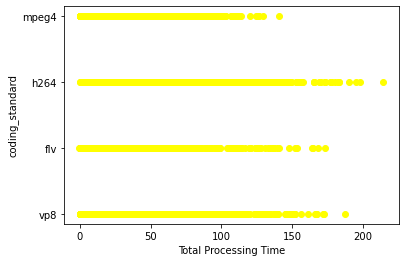

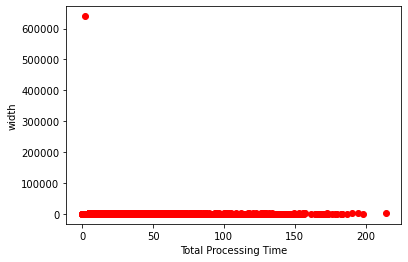

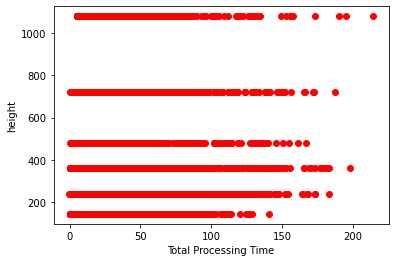

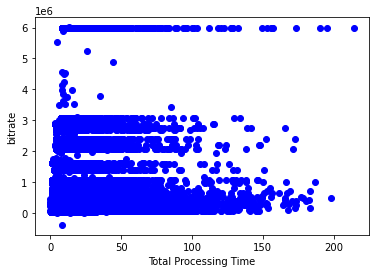

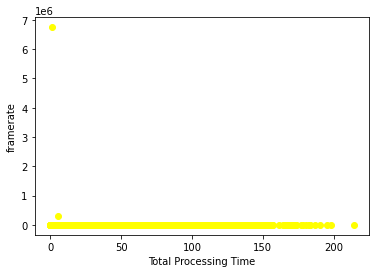

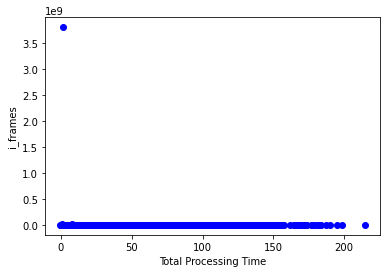

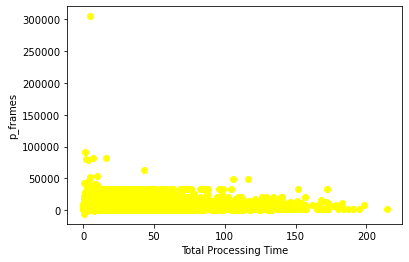

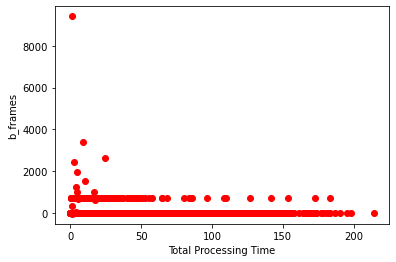

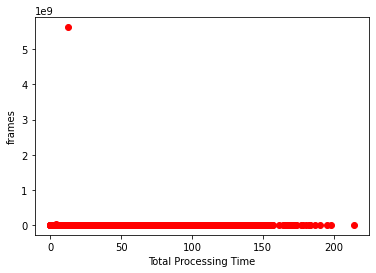

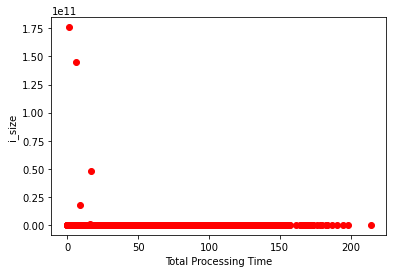

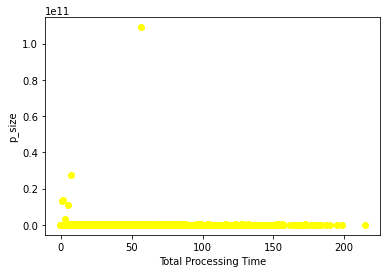

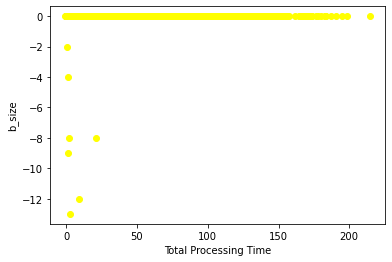

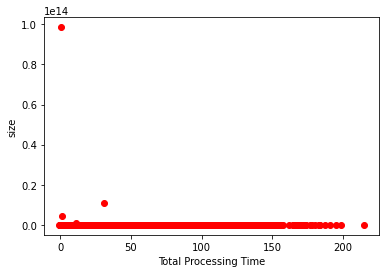

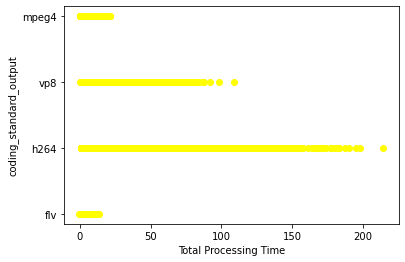

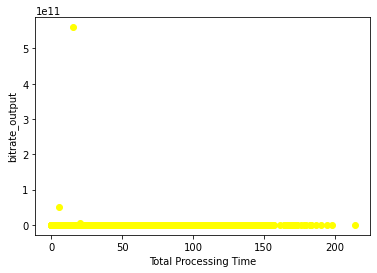

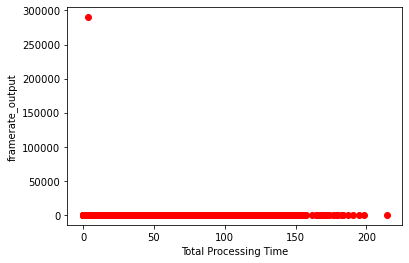

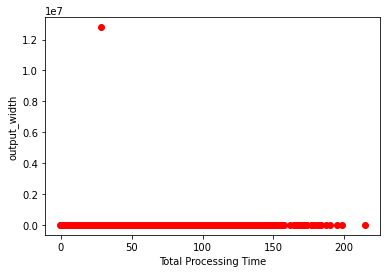

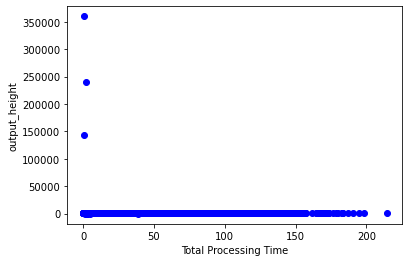

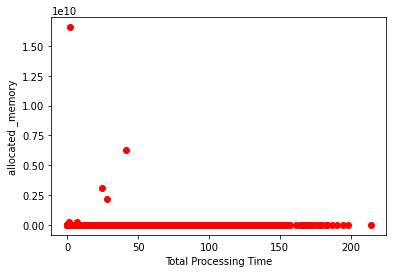

In [14]:
fig = plt.figure(figsize = (10, 6))
import random
colors = ['red', 'green', 'blue', 'yellow']
for i in list(df.columns)[1:-1]:
    try:
        c = random.randint(0,3)
        plt.scatter(x = list(df['total_processing_time']),y = list(df[i]), color = colors[c])
        plt.ylabel(i)
        plt.xlabel("Total Processing Time")
        plt.show()
    except:
        print("Plot not Possible")

## Heat Map:
**Shows us the correlation bettween the different data categories and the target variable**

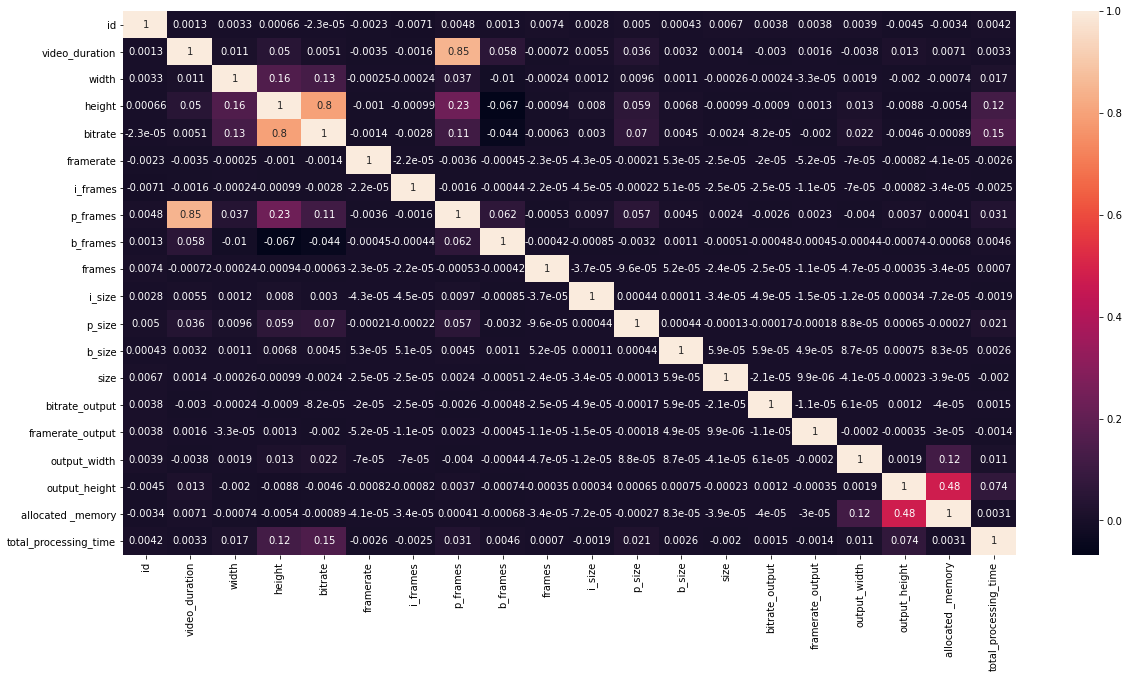

In [15]:
fig = plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

## Box Plot:
**Very Important as box plot will help us deal with the outliers in the data set and will help improve accuracyof our selected model.**

video_duration


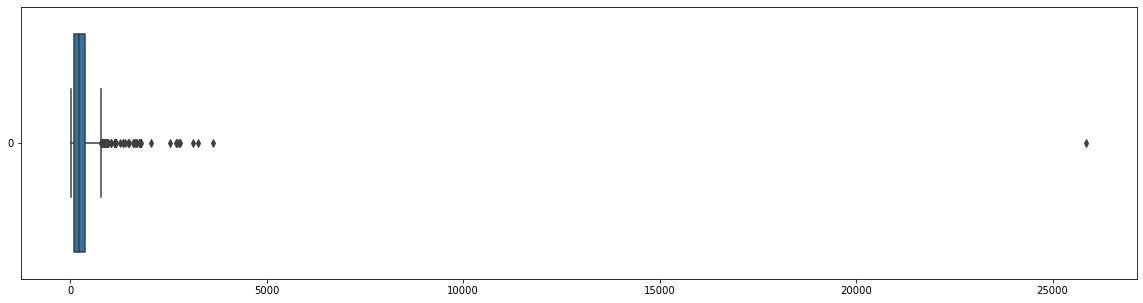

coding_standard
Categorical Data
width


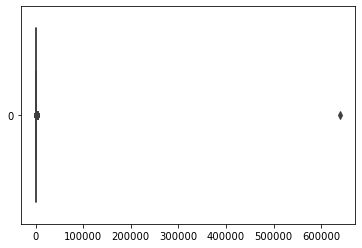

height


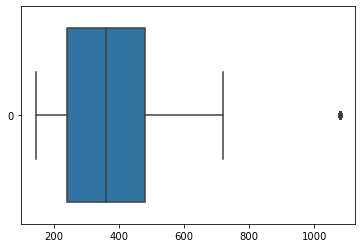

bitrate


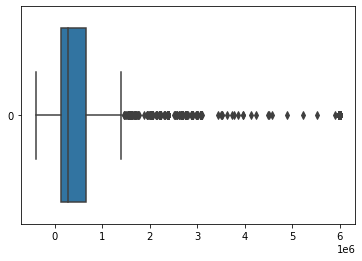

framerate


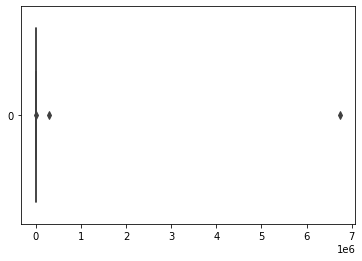

i_frames


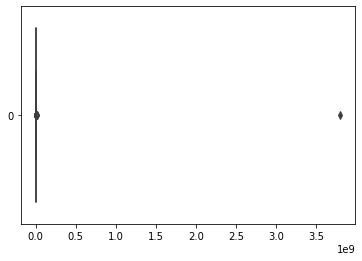

p_frames


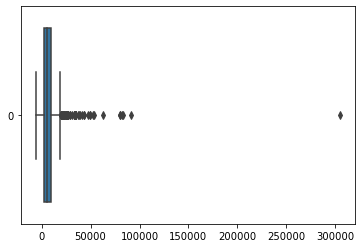

b_frames


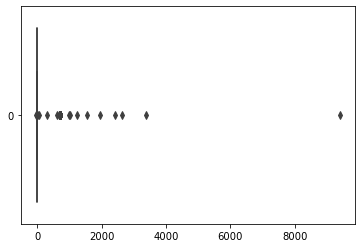

frames


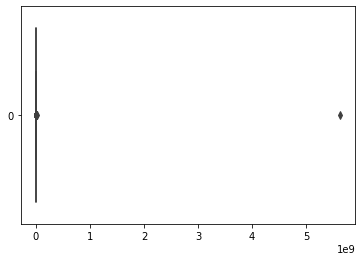

i_size


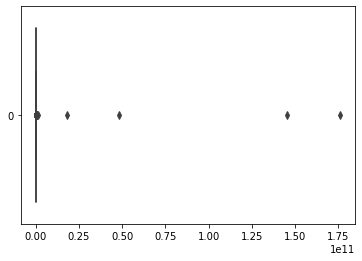

p_size


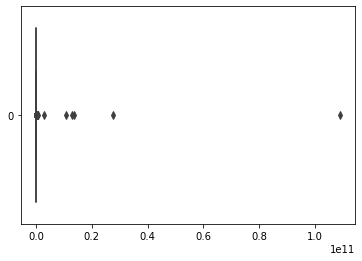

b_size


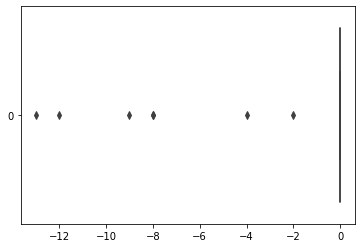

size


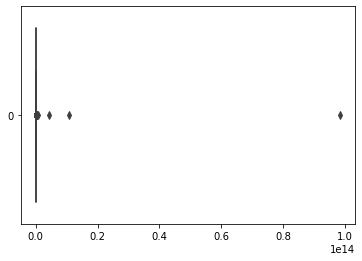

coding_standard_output
Categorical Data
bitrate_output


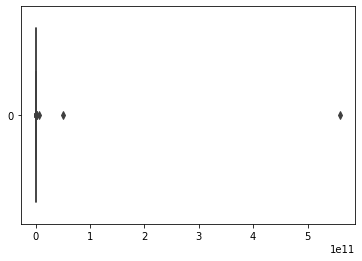

framerate_output


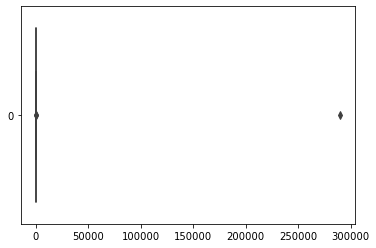

output_width


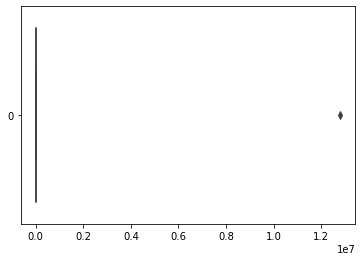

output_height


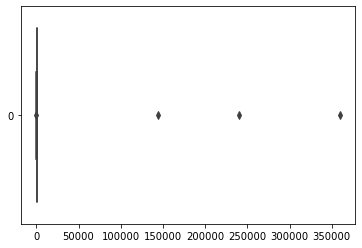

allocated _memory


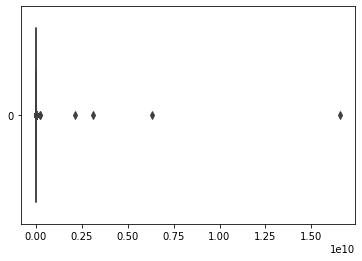

total_processing_time


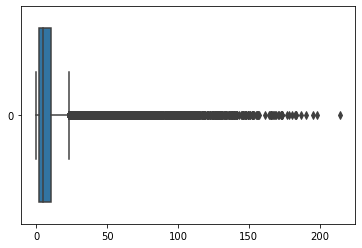

In [16]:
col_name = list(df.columns)
fig = plt.figure(figsize = (20, 5))
for i in range(1, 22):
    try:
        print(col_name[i])
        sns.boxplot(data=df.iloc[:, i], orient="h")
        plt.show()
    except:
        print("Categorical Data")
       

**It is clearly visible that our data set has many extreme values which are not good for our prdiction we will try and remove all such values and refine our data set we will initially start with removing the top 10 Percentile(%) of the data in columns with maximum outliers and then modify the data according to the performance of our model. This will make sure that the model makes the best prediction possible.**

In [17]:
df = df[(df['video_duration']<3000)&(df['width']<100000)
       &(df['b_size']>-10)&(df['frames']<25000)&(df['p_frames']<60000)&(df['i_frames']<10**8)&(df['b_frames']<50)
       &(df['framerate']<100000)&(df['bitrate']<3.5*10**6)&(df['b_frames']<2000)&(df['b_frames']>-10)
       &(df['framerate_output']<40000)&(df['bitrate_output']<0.2*10**8)
       &(df['output_height']< 50000)&(df['p_size']<10**8)&(df['i_size']<5*10**9)]

**After a lot of trial and error we finally settled at this particular filteration as thsi filteration was giving usthe best possible result for every column considered the top 10 percentile(%) data was removed. The Target variable is left untouched.**

video_duration


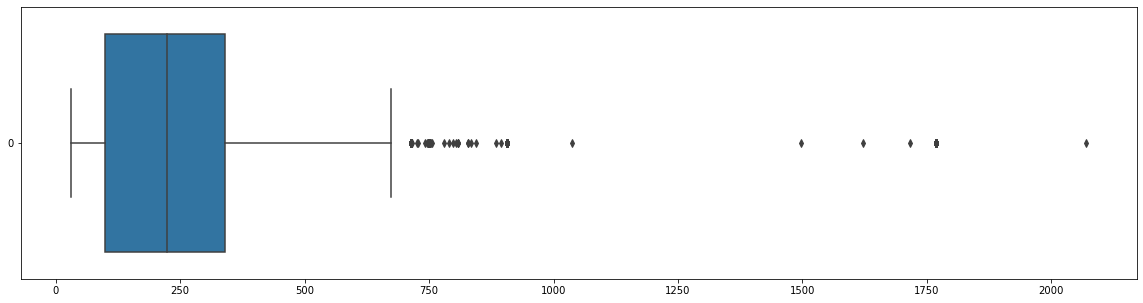

coding_standard
Categorical Data
width


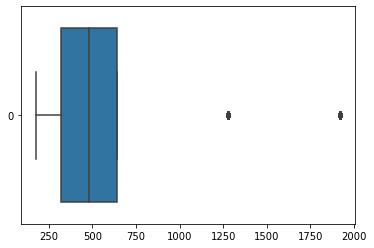

height


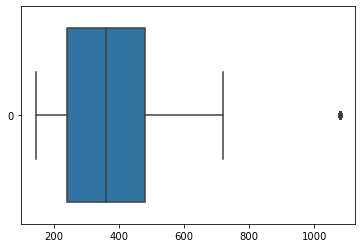

bitrate


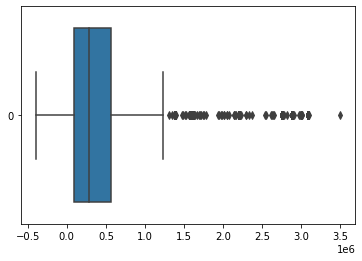

framerate


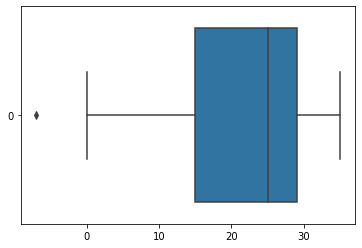

i_frames


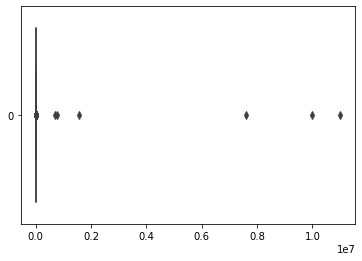

p_frames


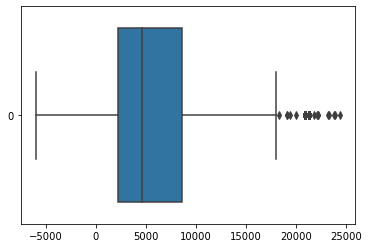

b_frames


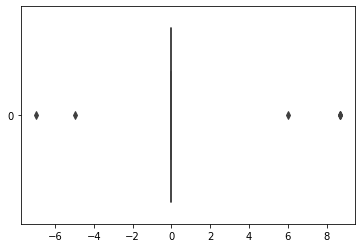

frames


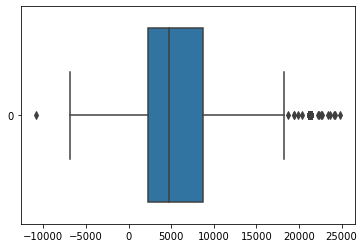

i_size


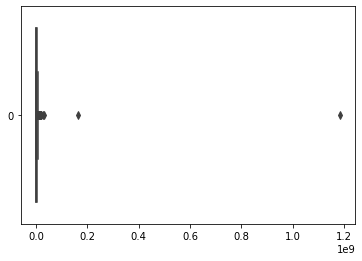

p_size


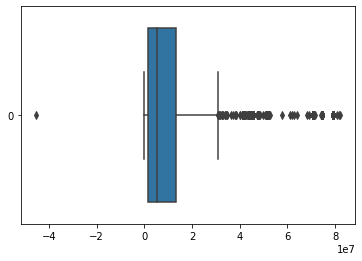

b_size


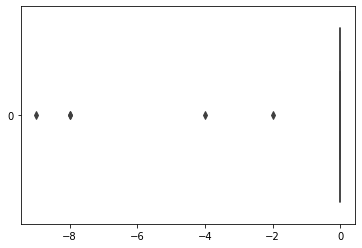

size


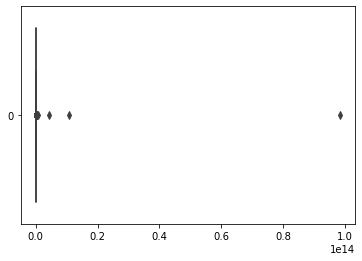

coding_standard_output
Categorical Data
bitrate_output


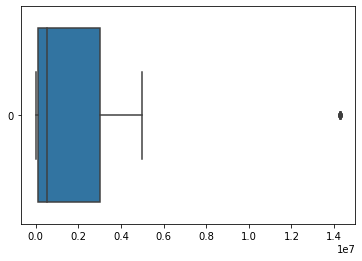

framerate_output


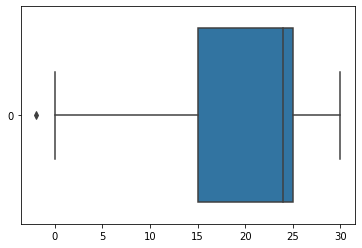

output_width


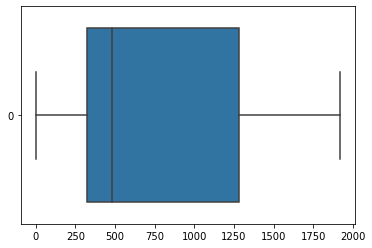

output_height


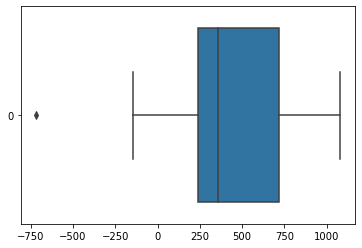

allocated _memory


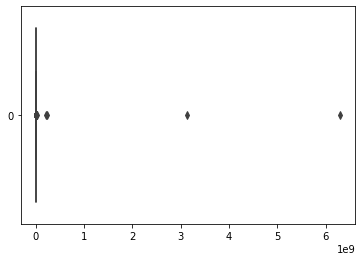

total_processing_time


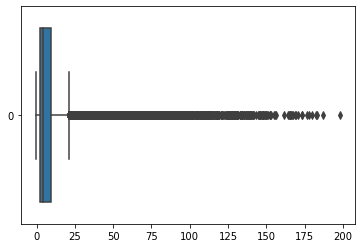

In [18]:
col_name = list(df.columns)
fig = plt.figure(figsize = (20, 5))
for i in range(1, 22):
    try:
        print(col_name[i])
        sns.boxplot(data=df.iloc[:, i], orient="h")
        plt.show()
    except:
        print("Categorical Data")
       

### Result Evaluation:
**As we can clearly see most of the data is now in our desired range so we will move forward and do some more analsis before training our model.[](http://)**

In [19]:
df

,id,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,...,p_size,b_size,size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,allocated _memory,total_processing_time
0,1,131.759995,vp8,640.0,480.0,1.047230e+05,25.145039,37.0,3257.0,0.0,...,778937.0,0.0,1724802.0,flv,539000.0,24.000000,640.0,480.0,221152.0,1.048
1,2,189.955994,flv,320.0,240.0,2.312960e+05,29.000000,97.0,5597.0,0.0,...,4911734.0,0.0,5492026.0,flv,109000.0,29.969999,320.0,240.0,218664.0,-0.468
2,3,110.966995,h264,480.0,360.0,6.926718e+05,30.000000,59.0,3271.0,0.0,...,4978664.0,0.0,5508291.0,h264,56000.0,15.000000,320.0,240.0,216820.0,3.696
3,4,95.461998,h264,640.0,480.0,8.092560e+05,29.000000,51.0,2811.0,0.0,...,8770159.0,0.0,9656655.0,vp8,109000.0,12.000000,320.0,240.0,221160.0,3.452
4,5,63.667000,h264,640.0,480.0,9.725720e+05,15.000000,33.0,923.0,0.0,...,6480438.0,0.0,7740095.0,flv,56000.0,24.000000,1280.0,720.0,219656.0,2.692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48142,48143,167.391663,h264,1280.0,720.0,2.207484e+06,24.000000,86.0,3931.0,0.0,...,41819888.0,0.0,46189308.0,mpeg4,820000.0,15.000000,1920.0,1080.0,219656.0,9.777
48146,48147,67.583336,mpeg4,176.0,144.0,5.122500e+04,12.000000,15.0,777.0,0.0,...,385164.0,0.0,432749.0,vp8,5000000.0,12.000000,1920.0,1080.0,219480.0,22.417
48147,48148,581.232971,h264,480.0,360.0,2.959790e+05,30.000000,310.0,17128.0,0.0,...,11352574.0,0.0,21504146.0,vp8,5000000.0,15.000000,640.0,480.0,218932.0,6.460
48148,48149,645.840027,vp8,320.0,240.0,9.590300e+04,25.032558,138.0,16008.0,0.0,...,6660941.0,0.0,7742262.0,vp8,539000.0,29.969999,176.0,144.0,219196.0,1.976


### Converting Categorical Data into Numerical Data:
**We will now do One Hot Encoding to the categorical data columns. To accomplish this task we have used the get_dummies method in the Pandas Library this will create a new data frame with encoded values which we will concat to the main data frame** 

In [20]:
df_1 = pd.get_dummies(df["coding_standard"])
df_1.head()

,flv,h264,mpeg4,vp8
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


**For the second encoding we will have to rename the columns as we dont want two cols with same name in our data set.**

In [21]:
df_2 =  pd.get_dummies(df["coding_standard_output"])
df_2.rename({"flv":"flv_o", "h264":"h264_o", "mpeg4":"mpeg4_o", "vp8":"vp8_o"}, axis="columns",inplace=True)
df_2.head()

,flv_o,h264_o,mpeg4_o,vp8_o
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,0


**Removing the column with categorical data and appending the Encoded data to the Final Data Frame**

In [22]:
df.drop(columns=['id', 'coding_standard', 'coding_standard_output'], inplace=True)
final_df = pd.concat([df, df_1],axis = 1)
final_df = pd.concat([final_df, df_2],axis = 1)
final_df.head()

,video_duration,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,...,allocated _memory,total_processing_time,flv,h264,mpeg4,vp8,flv_o,h264_o,mpeg4_o,vp8_o
0,131.759995,640.0,480.0,104723.0000,25.145039,37.0,3257.0,0.0,3294.0,945865.0,...,221152.0,1.048,0,0,0,1,1,0,0,0
1,189.955994,320.0,240.0,231296.0000,29.000000,97.0,5597.0,0.0,5694.0,580292.0,...,218664.0,-0.468,1,0,0,0,1,0,0,0
2,110.966995,480.0,360.0,692671.8125,30.000000,59.0,3271.0,0.0,3330.0,529627.0,...,216820.0,3.696,0,1,0,0,0,1,0,0
3,95.461998,640.0,480.0,809256.0000,29.000000,51.0,2811.0,0.0,2862.0,886496.0,...,221160.0,3.452,0,1,0,0,0,0,0,1
4,63.667000,640.0,480.0,972572.0000,15.000000,33.0,923.0,0.0,956.0,1259657.0,...,219656.0,2.692,0,1,0,0,1,0,0,0


In [23]:
x = list(final_df["total_processing_time"])
final_df.drop(columns="total_processing_time", inplace = True)
final_df['total_processing_time'] = x
final_df.head()

,video_duration,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,...,allocated _memory,flv,h264,mpeg4,vp8,flv_o,h264_o,mpeg4_o,vp8_o,total_processing_time
0,131.759995,640.0,480.0,104723.0000,25.145039,37.0,3257.0,0.0,3294.0,945865.0,...,221152.0,0,0,0,1,1,0,0,0,1.048
1,189.955994,320.0,240.0,231296.0000,29.000000,97.0,5597.0,0.0,5694.0,580292.0,...,218664.0,1,0,0,0,1,0,0,0,-0.468
2,110.966995,480.0,360.0,692671.8125,30.000000,59.0,3271.0,0.0,3330.0,529627.0,...,216820.0,0,1,0,0,0,1,0,0,3.696
3,95.461998,640.0,480.0,809256.0000,29.000000,51.0,2811.0,0.0,2862.0,886496.0,...,221160.0,0,1,0,0,0,0,0,1,3.452
4,63.667000,640.0,480.0,972572.0000,15.000000,33.0,923.0,0.0,956.0,1259657.0,...,219656.0,0,1,0,0,1,0,0,0,2.692


In [24]:
list(final_df.columns)[0:26]

['video_duration',
 'width',
 'height',
 'bitrate',
 'framerate',
 'i_frames',
 'p_frames',
 'b_frames',
 'frames',
 'i_size',
 'p_size',
 'b_size',
 'size',
 'bitrate_output',
 'framerate_output',
 'output_width',
 'output_height',
 'allocated _memory',
 'flv',
 'h264',
 'mpeg4',
 'vp8',
 'flv_o',
 'h264_o',
 'mpeg4_o',
 'vp8_o']

In [25]:
final_df.drop(columns=['allocated _memory', 'size'], inplace = True)

**We will be dropping the allocated memory and size columns as those columsn have high irregularities and have poor co relation with the target variable**

## Data Preparation:
**For this task we will use the train test split method from sklearn wich will segregate our data into training data and evaluation data we will keep the evaluation size 0.1 as we just want to check our model accuracy so that we can make any changes if needed**

In [26]:
from sklearn.model_selection import train_test_split

X = final_df.iloc[:, 0:24].values
Y = final_df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

## Model Selection:

**As our Target Variable has continuous values we will make use of a Regression Model for this task we will be using the RandomForestRegression Model, Gradient Boost Regressor and Bagging Regressor from Sklearn.ensemble. We tried using other models like a LinearRegression model but that was giving a lower accuracry. We will be using the concept of weighted average for the final prediction.**

In [27]:
from sklearn.ensemble import RandomForestRegressor

reg_1 = RandomForestRegressor(n_estimators=100)
reg_1.fit(x_train, y_train)
s_1 = reg_1.score(x_test, y_test)

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

reg_2 = GradientBoostingRegressor(loss='ls', learning_rate=0.50, n_estimators=128, max_depth = 11)
reg_2.fit(x_train, y_train)
s_2 = reg_2.score(x_test, y_test)

In [29]:
from sklearn.ensemble import BaggingRegressor

reg_3 = BaggingRegressor(n_estimators=128)
reg_3.fit(x_train, y_train)
s_3 = reg_3.score(x_test, y_test)

**It is visilble that we are getting an accuracy of 98% or 99% across all the models which is a great accuracy and now very little can be done to improve it anymore so we will settle at this score and make predictions for our model using this regression model.**

**Now we will train our model using the complete train data set.**

In [30]:
x_train = final_df.iloc[:, 0:24].values
y_train = final_df.iloc[:, -1].values


reg_1.fit(x_train, y_train)
reg_2.fit(x_train, y_train)
reg_3.fit(x_train, y_train)

BaggingRegressor(n_estimators=128)

## Loading Test Data Set for making Prediction:

**We will check all the null values and changethem to mean values this will be followed by one hot encoding the categorical data and then predicting the values for our task**

In [31]:
test_df = pd.read_csv('/kaggle/input/vishwatatva-datacon-2020/test.csv')
test_df.head()

,id,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,...,i_size,p_size,b_size,size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,allocated _memory
0,48151,130.35667,mpeg4,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,...,64483.0,825054.0,0.0,889537.0,mpeg4,56000.0,12.0,320.0,240.0,25164.0
1,48152,130.35667,mpeg4,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,...,64483.0,825054.0,0.0,889537.0,mpeg4,56000.0,12.0,1280.0,720.0,58528.0
2,48153,130.35667,mpeg4,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,...,64483.0,825054.0,0.0,889537.0,mpeg4,56000.0,12.0,1920.0,1080.0,102072.0
3,48154,130.35667,mpeg4,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,...,64483.0,825054.0,0.0,889537.0,mpeg4,56000.0,15.0,1920.0,1080.0,102072.0
4,48155,130.35667,mpeg4,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,...,64483.0,825054.0,0.0,889537.0,mpeg4,56000.0,25.0,640.0,480.0,34308.0


In [32]:
df_test_1 = pd.get_dummies(test_df["coding_standard"])
df_test_1.head()

,flv,h264,mpeg4,vp8
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [33]:
df_test_2 = pd.get_dummies(test_df["coding_standard_output"])
df_test_2.rename({"flv":"flv_o", "h264":"h264_o", "mpeg4":"mpeg4_o", "vp8":"vp8_o"}, axis="columns",inplace=True)
df_test_2.head()

,flv_o,h264_o,mpeg4_o,vp8_o
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [34]:
ids = list(test_df['id'])
test_df.drop(columns=['id', 'coding_standard', 'coding_standard_output'], inplace=True)
test_df = pd.concat([test_df, df_test_1],axis = 1)
test_df = pd.concat([test_df, df_test_2],axis = 1)
test_df.head()

,video_duration,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,...,output_height,allocated _memory,flv,h264,mpeg4,vp8,flv_o,h264_o,mpeg4_o,vp8_o
0,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,...,240.0,25164.0,0,0,1,0,0,0,1,0
1,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,...,720.0,58528.0,0,0,1,0,0,0,1,0
2,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,...,1080.0,102072.0,0,0,1,0,0,0,1,0
3,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,...,1080.0,102072.0,0,0,1,0,0,0,1,0
4,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,...,480.0,34308.0,0,0,1,0,0,0,1,0


In [35]:
test_df.isnull().sum()

video_duration        5
width                 4
height                2
bitrate               9
framerate            13
i_frames             11
p_frames              3
b_frames              9
frames               10
i_size                8
p_size                9
b_size                2
size                 13
bitrate_output        5
framerate_output      8
output_width          5
output_height         7
allocated _memory     2
flv                   0
h264                  0
mpeg4                 0
vp8                   0
flv_o                 0
h264_o                0
mpeg4_o               0
vp8_o                 0
dtype: int64

In [36]:
def replace_nan():
    for i in range(0, 18):
        try:
            mean = test_df.iloc[:, i].mean(skipna=True)
            test_df.iloc[:, i].fillna(mean, inplace = True)
        except TypeError:
            pass
replace_nan()

**Checking for all the null values and confirming if there are any more null values.**

In [37]:
test_df.isnull().sum()

video_duration       0
width                0
height               0
bitrate              0
framerate            0
i_frames             0
p_frames             0
b_frames             0
frames               0
i_size               0
p_size               0
b_size               0
size                 0
bitrate_output       0
framerate_output     0
output_width         0
output_height        0
allocated _memory    0
flv                  0
h264                 0
mpeg4                0
vp8                  0
flv_o                0
h264_o               0
mpeg4_o              0
vp8_o                0
dtype: int64

In [38]:
test_df.drop(columns=['allocated _memory', 'size'], inplace=True)

**Dropping the unecessary columns like the allocated memory and size.**

## Weighted Average of all three Models:

1. Random Forest
2. Gradient Boost
3. Bagging Regressor

In [39]:
x = test_df.iloc[:, 0:24].values
prediction_1 = np.array(reg_1.predict(x))
prediction_2 = np.array(reg_2.predict(x))
prediction_3 = np.array(reg_3.predict(x))
# Formula
prediction = (prediction_1*s_1 + prediction_2*s_2 + prediction_3*s_3)/(s_1+s_2+s_3)

**Finally Predicting the values and creating a file called submission.csv**

In [40]:
sub = pd.DataFrame({'id':ids, 'total_processing_time':prediction})
sub.to_csv("Submission.csv", index=False)

##### **Task Has been Successfully completed. with score ranging in category of 95-100%**